In [172]:
#Working with Text Data and Naive Bayes in Scikit-Learn (50 points)
#Representing text as data
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
simple_train_dtm = vect.fit_transform(simple_train)
print(simple_train_dtm)

  (0, 4)	1
  (0, 5)	1
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 1)	1
  (2, 3)	2
  (2, 2)	1
  (2, 1)	1


In [174]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [175]:
import pandas as pd
print(vect.get_feature_names())
pd.DataFrame(simple_train_dtm.toarray(), columns = vect.get_feature_names())

['cab', 'call', 'me', 'please', 'tonight', 'you']


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [176]:
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
print(simple_test_dtm)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1


In [177]:
pd.DataFrame( simple_test_dtm.toarray(), columns = vect.get_feature_names() )

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [178]:
#Reading SMS data
sms = pd.read_table('sms.tsv', header = None, names = ['label', 'message'])
print('dimension:', sms.shape)
sms.head(5)

dimension: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
sms['label_num'] = sms['label'].map({'ham': 0, 'spam': 1})
sms.head(5)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [180]:
from sklearn.model_selection import train_test_split
X = sms['message']
y = sms['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [181]:
#Vectorizing SMS data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [182]:
#Building a Naive Bayes model by using Multinomial Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [183]:
from sklearn import metrics
y_pred_class = nb.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))

0.9885139985642498
[[1203    5]
 [  11  174]]


In [184]:
print('false positives')
print(X_test[(y_pred_class == 1) & (y_test == 0)])

false positives
574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object


In [185]:
print('false negatives')
print(X_test[y_pred_class < y_test])

false negatives
3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object


In [197]:
#Linear Regression (50 points)
import pandas as pd
from sklearn.datasets import load_boston 
boston = load_boston()
y = boston.target
boston = pd.DataFrame(boston.data)
boston.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [206]:
import pandas as pd
from sklearn.datasets import load_boston 
boston = load_boston()
y = boston.target
boston = pd.DataFrame(boston.data, columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'])
corr = boston.corr()
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


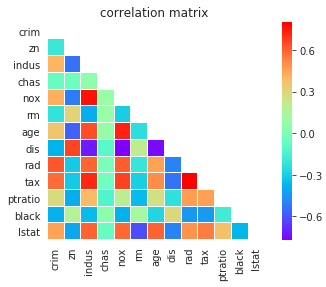

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.zeros_like(boston.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(boston.corr(), cmap ='rainbow', mask=mask, vmax=.8, linewidths = 0.05, square=True)
    ax.set_title('correlation matrix ')

In [ ]:
#In the above plot, what features are highly correlated? Which features are highly uncorrelated?
The more darker color is, the more highly features correlate with. 
The less darker color is, the less highly features correlate with.
In the above plot, nox and indus, age and indus, age and nox, tax and indus, tax and rad are highly correlated.
dis and indus, dis and nox, dis and age are highly uncorrelated.

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston, y,test_size=0.25, random_state=0)

In [263]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [264]:
print(y_pred)

[24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147448 18.

In [268]:
print("the accuracy score of this modle is :",lm.score(X_test,y_test))
# lm.score(y_test，y_pred)

the accuracy score of this modle is : 0.6354638433202129


In [223]:
coefficient = lm.coef_
print("the coefficient of my modle is:")
print(coefficient)

the coefficient of my modle is:
[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]


In [224]:
import sklearn as sl
score = sl.metrics.r2_score(y_test, y_pred)
print(score)
mse = sl.metrics.mean_squared_error(y_test, y_pred)
print(mse)
mae = sl.metrics.mean_absolute_error(y_test, y_pred)
print(mae)

0.6354638433202129
29.78224509230237
3.6683301481357113


In [ ]:
#positive coefficient & negative coefficient
A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables.
Positive Coefficient refers to the growth of independent variables, and the dependent variable also grows. 
The two variables change in the same direction. 
When one variable changes from large to small or from small to large, the other variable also changes from large to small or small to large.

Negative Coefficient indicates that the dependent variable value decreases (increases) as the independent variable value increases (decreases). 
In this case, the correlation coefficient between the dependent variable and the independent variable is negative

In [ ]:
R-squared is a statistical measure of how close the data are to the fitted regression line. 
It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
In general, the higher the R-squared, the better the model fits your data.

In [ ]:
Mean Squared Error measures the average of the squares of the errors, that is, the average squared difference between the estimated values and what is estimated. 
Mean Squared Error is a risk function, corresponding to the expected value of the squared error loss.

In [ ]:
Mean Absolute Error is a measure of difference between two continuous variables.
Mean Absolute Error tells us how big of an error we can expect from the forecast on average.

In [ ]:
What the numbers tell me is the model can accurately predict the new value and the result is trustworthy.

In [ ]:
Bonus: dimensionaity reduction is a practical solution.